In [33]:
from ultralytics import YOLO

posemodel = model = YOLO('../boneyolo/Bone_keypoints/yolov8x-pose-p6_200_epochs_augmented3/weights/last.pt')


In [34]:
import os 
test_path = './test/'
test_files = os.listdir(test_path)
test_files = [test_path + test_file for test_file in test_files]
test_files

['./test/O_kar_37_w_d-3.JPG',
 './test/2_Oo_FM58044_R_m_d.JPG',
 './test/5_Oo_FM97957_L_f_d.JPG',
 './test/2_Oo_FM58038_L_m_d.JPG',
 './test/O_kar_168_m_d_4.JPG',
 './test/2_Oo_FM58065_R_f_d.JPG',
 './test/O_kar_254_m_d_1.JPG',
 './test/O_kar_208_w_d_2.JPG']

In [35]:
import pandas as pd
import torch 

distances = []

results = model(test_files)  # return a list of Results objects
idx = 0
test_df = pd.read_csv('../bonercnn/data/landmarks_test.csv')
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    pred_keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs

    #result.show()  # display to screen
    #result.save(filename=f"./yolo_result_last/{test_files[idx].split('/')[2]}")  # save to disk

    original_keypoints = torch.Tensor(test_df.loc[test_df.loc[:, 'image_name'].str.contains(test_files[idx].split('/')[2])].iloc[:, 1:].to_numpy().reshape(-1, 2))
    pred_keypoints = pred_keypoints.data[:, :, :2]

    distances.append(torch.cdist(original_keypoints, pred_keypoints).diag())
    image = cv2.imread(image_path)
    #image = drawKeyPts(image, original_keypoints,(255,0,0),2, None)
    drawKeyPts(image, pred_keypoints,(255,0,0),2, os.path.join(savepath, f'{img_name}.png'))

    print(pred_keypoints)
    idx += 1


0: 896x1280 1 bone, 52.4ms
1: 896x1280 1 bone, 52.4ms
2: 896x1280 1 bone, 52.4ms
3: 896x1280 1 bone, 52.4ms
4: 896x1280 1 bone, 52.4ms
5: 896x1280 1 bone, 52.4ms
6: 896x1280 1 bone, 52.4ms
7: 896x1280 1 bone, 52.4ms
Speed: 4.5ms preprocess, 52.4ms inference, 0.6ms postprocess per image at shape (1, 3, 896, 1280)
tensor([[[1942.7312,  503.7366],
         [1615.8041,  689.3751],
         [1376.9425,  554.2509],
         [1299.8792, 1110.6913],
         [1268.1760, 1245.4880],
         [1293.2666, 1719.3215],
         [1647.3134, 1672.2959],
         [2073.4978, 1521.6437],
         [2049.3611, 1301.9001],
         [1901.4435, 1234.9642],
         [2050.2271,  746.1060]]], device='cuda:0')
tensor([[[2151.5549,  377.4943],
         [1828.2731,  548.9680],
         [1592.9965,  419.9073],
         [1524.1006,  966.5798],
         [1485.7196, 1097.8942],
         [1507.2161, 1565.0743],
         [1854.9692, 1525.1489],
         [2267.7236, 1374.4741],
         [2240.7539, 1157.5858],
      

In [1]:
import pandas as pd

In [2]:
test_keypoints = pd.read_csv('landmarks_test.csv').iloc[:, 1:].to_numpy()

In [3]:
print(test_keypoints)
test_keypoints.reshape(test_keypoints.shape[0], -1, 2)

[[1780  419 1444  617 1237  502 1175 1036 1123 1173 1158 1702 1501 1637
  1936 1506 1925 1238 1770 1170 1890  564]
 [2193  379 1830  532 1604  413 1516  995 1471 1113 1472 1565 1824 1542
  2244 1393 2264 1180 2087 1123 2284  752]
 [1983  390 1638  591 1398  464 1365  958 1327 1123 1367 1610 1695 1569
  2098 1380 2103 1147 1930 1123 2118  647]
 [1779  536 1490  686 1291  559 1238 1051 1200 1167 1217 1605 1529 1575
  1861 1409 1870 1210 1733 1161 1882  742]
 [1885  417 1622  593 1357  469 1297 1022 1258 1176 1293 1596 1679 1522
  2065 1380 2049 1144 1907 1099 1999  578]
 [1871  483 1597  637 1354  505 1302 1032 1266 1138 1264 1597 1590 1567
  2005 1463 1955 1244 1829 1182 1951  654]
 [1893  534 1592  722 1351  620 1311 1214 1293 1287 1294 1723 1667 1665
  2045 1507 2015 1298 1886 1254 2011  665]
 [1934  500 1620  723 1340  577 1290 1070 1265 1266 1302 1728 1664 1687
  2080 1455 2069 1273 1916 1212 2033  640]]


array([[[1780,  419],
        [1444,  617],
        [1237,  502],
        [1175, 1036],
        [1123, 1173],
        [1158, 1702],
        [1501, 1637],
        [1936, 1506],
        [1925, 1238],
        [1770, 1170],
        [1890,  564]],

       [[2193,  379],
        [1830,  532],
        [1604,  413],
        [1516,  995],
        [1471, 1113],
        [1472, 1565],
        [1824, 1542],
        [2244, 1393],
        [2264, 1180],
        [2087, 1123],
        [2284,  752]],

       [[1983,  390],
        [1638,  591],
        [1398,  464],
        [1365,  958],
        [1327, 1123],
        [1367, 1610],
        [1695, 1569],
        [2098, 1380],
        [2103, 1147],
        [1930, 1123],
        [2118,  647]],

       [[1779,  536],
        [1490,  686],
        [1291,  559],
        [1238, 1051],
        [1200, 1167],
        [1217, 1605],
        [1529, 1575],
        [1861, 1409],
        [1870, 1210],
        [1733, 1161],
        [1882,  742]],

       [[1885,  417],
  

In [4]:
import torch
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from torchvision.models.detection.keypoint_rcnn import KeypointRCNNPredictor

# Load a pre-trained model
weights = torch.load('./models/rcnn-scratch-augmented/keypointrcnn_resnet50_fpn.pth')
model = keypointrcnn_resnet50_fpn(weights='DEFAULT')

# Replace the classifier head with the number of keypoints
in_features = model.roi_heads.keypoint_predictor.kps_score_lowres.in_channels
model.roi_heads.keypoint_predictor = KeypointRCNNPredictor(in_channels=in_features, num_keypoints=11)

model.weights = weights
device = 'cuda'
# Set the model's device and data type
model.to(device=device)

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [12]:
print(weights)

OrderedDict({'backbone.body.conv1.weight': tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
           -4.3034e-02, -7.0755e-02],
          [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
           -2.0912e-02, -3.8517e-02],
          [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
            6.2641e-02,  5.1977e-02],
          ...,
          [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
           -7.6604e-02,  7.8453e-03],
          [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
           -3.3662e-02, -1.5709e-02],
          [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
            2.2439e-02,  1.7077e-03]],

         [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02,
            4.4022e-02, -9.4675e-03],
          [-7.7273e-03,  1.8890e-02,  6.7981e-02,  ...,  1.5956e-01,
            1.4606e-01,  1.1999e-01],
          [-4.6013e-02, -7.6075e-02, -8.9648e-02,  ...,  1.2108e-01,
            1.6

In [5]:
import os

img_files = os.listdir()

In [6]:
import cv2

org_img = cv2.imread('./test/2_Oo_FM58038_L_m_d.JPG')

In [7]:
import cv2
from torchvision import transforms

img = cv2.imread('./test/2_Oo_FM58038_L_m_d.JPG')
img = transforms.ToTensor()(img).to('cuda')
imgs = [img]
#print(img)
#print(imgs)
model.to('cuda')
model.eval()
with torch.no_grad():
    results = model(imgs)

In [15]:
results

[{'boxes': tensor([[1081.5366,  401.0871, 1951.6246, 1702.1537]], device='cuda:0'),
  'labels': tensor([1], device='cuda:0'),
  'scores': tensor([0.5385], device='cuda:0'),
  'keypoints': tensor([[[1.1603e+03, 4.7174e+02, 1.0000e+00],
           [1.5313e+03, 1.6315e+03, 1.0000e+00],
           [1.0829e+03, 1.0290e+03, 1.0000e+00],
           [1.1923e+03, 1.2129e+03, 1.0000e+00],
           [1.4699e+03, 4.0509e+02, 1.0000e+00],
           [1.8729e+03, 1.2103e+03, 1.0000e+00],
           [1.5633e+03, 7.0103e+02, 1.0000e+00],
           [1.0829e+03, 1.0769e+03, 1.0000e+00],
           [1.2217e+03, 1.1223e+03, 1.0000e+00],
           [1.7795e+03, 1.1223e+03, 1.0000e+00],
           [1.0829e+03, 1.1676e+03, 1.0000e+00]]], device='cuda:0'),
  'keypoints_scores': tensor([[1.2307, 1.0139, 1.2545, 0.8070, 1.0890, 0.7581, 0.6879, 0.8495, 1.1469,
           1.0807, 1.0884]], device='cuda:0')}]

In [14]:
# Set the confidence threshold
conf_threshold = 0.8
min_img_scale = 1.5

# Filter the output based on the confidence threshold
scores_mask = results['scores'] > conf_threshold

# Extract and scale the predicted keypoints
predicted_keypoints = (results['keypoints'][scores_mask])[:,:,:-1].reshape(-1,2)*min_img_scale

TypeError: list indices must be integers or slices, not str

In [8]:
test_df = pd.read_csv('landmarks_test.csv')
org_keypoints = test_df[test_df['image_name'].str.contains('2_Oo_FM58038_L_m_d')].iloc[0][1:].to_numpy().reshape(-1, 2)

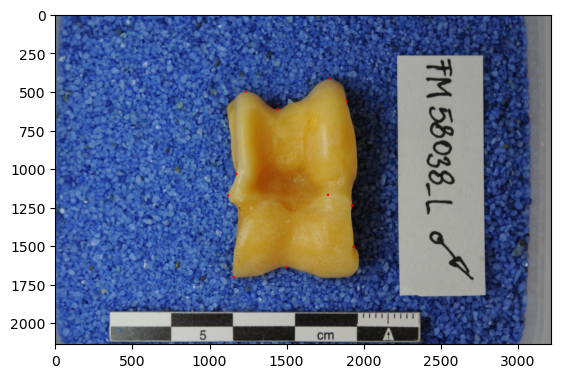

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def drawKeyPts(im,keyp,col,th):
    for curKey in keyp:
        x=int(curKey[0])
        y=int(curKey[1])
        size = 5
        cv2.circle(im,(x,y),size, col,thickness=th, lineType=8, shift=0) 
    plt.imshow(im)    
    return im    

imWithCircles = drawKeyPts(cv2.cvtColor(org_img.copy(), cv2.COLOR_BGR2RGB ) ,org_keypoints,(255,0,0),5)

In [10]:
pred_keypoints = results[0]['keypoints'][:, :, :2].tolist()[0]

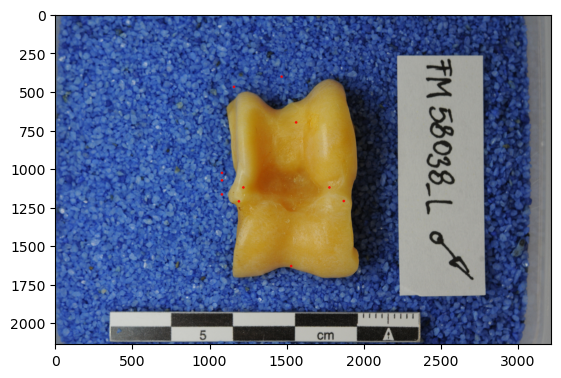

In [11]:
imWithCircles = drawKeyPts(cv2.cvtColor(org_img.copy(), cv2.COLOR_BGR2RGB ) ,pred_keypoints,(255,0,0),5)